In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# Dense Layers

Exponential LR Decay: 0.98

100 Epochs

## Index
0. fc layers
1. nodes per layer
2. top-1 accuracy
3. top-5 accuracy
4. last val loss
5. last val accuracy

In [2]:
fc_results = np.array([
    [1, 512, 49.29, 73.93, 2.95, 53.25],
    [1, 1024, 40.7, 68.38, 3.66, 45.22],
    [1, 2048, 32.12, 58.93, 4.66, 35.72],
    [1, 4096, 24.03, 46.76, 5.61, 27.94],
    [1, 8192, 19.70, 41.01, 6.42, 23.96],
    
    [2, 512, 56.64, 82.46, 1.94, 60.23],
    [2, 1024, 56.39, 81.53, 2.08, 60.91],
    [2, 2048, 51.39, 79.00, 2.38, 56.74],
    [2, 4096, 44.41, 71.83, 3.04, 47.61], # DEFAULT ALEXNET
    [2, 8192, 37.74, 64.36, 3.60, 42.40],
    
    [3, 512, 30.7, 65.16, 2.57, 30.82],
    [3, 1024, 48.36, 76.65, 2.30, 49.88],
    [3, 2048, 54.11, 80.48, 2.38, 58.21],
    [3, 4096, 54.48, 82.09, 2.39, 57.17],
    [3, 8192, 50.71, 78.57, 2.55, 55.88],
    
    [4, 512, 0.8, 2.1, 5.29, 0.55],
    [4, 1024, 0.8, 2.1, 5.29, 0.55],
    [4, 2048, 25.45, 60.9, 2.84, 28.55],
    [4, 4096, 41.14, 73.81, 2.81, 46.32],
    [4, 8192, 49.85, 77.58, 2.97, 53.92]
])

fc_0_results = [0, 196, 28.91, 54.05, 6.52, 33.21]

layers = [1, 2, 3, 4]
nodes = [512, 1024, 2048, 4096, 8192]

fc_matrix = np.zeros((4, 5))
for i in fc_results:
    fc_matrix[layers.index(i[0]), nodes.index(i[1])] = i[2]

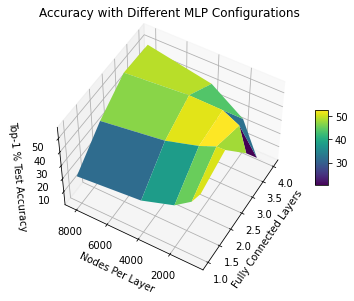

In [3]:
X, Y = np.meshgrid(layers, nodes)

# fig = plt.figure(figsize=(8, 5))
fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, fc_matrix.T, cmap='viridis')

ax.set_title('Accuracy with Different MLP Configurations')
ax.set_xlabel('Fully Connected Layers')
ax.set_ylabel('Nodes Per Layer')
ax.set_zlabel('Top-1 % Test Accuracy')

ax.view_init(50, -150)
fig.colorbar(surf, shrink=0.3, aspect=6)

plt.tight_layout()
plt.show()

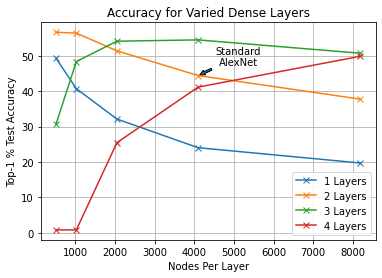

In [6]:
# plt.plot([196], fc_0_results[2], 'x-', label=f'0 Layers')

for i in layers:
    plt.plot(nodes, fc_matrix[i-1, :], 'x-', label=f'{i} Layers')

plt.annotate('Standard\nAlexNet', 
             (4096, fc_matrix[layers.index(2), nodes.index(4096)]),
             textcoords="offset points",
             xytext=(40, 10),
             ha='center',
             arrowprops={
                 'arrowstyle': 'simple'
             }
            )
    
plt.title('Accuracy for Varied Dense Layers')
plt.xlabel('Nodes Per Layer')
plt.ylabel('Top-1 % Test Accuracy')

plt.grid()
plt.legend()
plt.show()